# Natural Language Processing with Classification and Vector Spaces

Notas sobre o curso Natural Language Processing with Classification and Vector Spaces da DeeplearninigAI.

Repositório com a trilha Natural Language Processing:
https://github.com/k3ybladewielder/nlp

# Week 1 - Sentiment Analysis With Logistic Regression

## Objetivos de aprendizagem
- Sentiment analysis
- Logistic regression
- Data pre-processing
- Calculating word frequencies
- Feature extraction
- Vocabulary creation
- Supervised learning

## Supervised ML and Sentiment Analysis

Os algoritmos de **Machine Learning (ML)** supervisionados são um tipo de algoritmo que aprende a partir de dados rotulados, ou seja, dados que já possuem um rótulo ou uma classificação pré-definida. Esses algoritmos usam esses dados rotulados para aprender a fazer previsões ou classificações em novos dados.

Na área de Processamento de Linguagem Natural (NLP), os algoritmos de ML supervisionados são usados para uma variedade de tarefas, como classificação de sentimentos, identificação de entidades nomeadas, análise de tópicos, tradução automática, entre outras.

Um exemplo de como esses algoritmos são usados em NLP é na classificação de sentimentos em textos. Nesse caso, um modelo de ML supervisionado seria **treinado em um conjunto de dados rotulados** que contém textos e suas respectivas classificações de sentimento (por exemplo, positivo, negativo ou neutro). O algoritmo usaria esses dados para **aprender a reconhecer padrões nos textos** e, em seguida, aplicaria esses padrões para **classificar o sentimento em novos textos**.

Outro exemplo é na identificação de **entidades nomeadas (NER)**, que é uma tarefa que envolve a identificação de nomes de pessoas, locais, organizações e outras entidades em um texto. Nesse caso, um modelo de ML supervisionado seria treinado em um conjunto de dados rotulados que contém textos e suas respectivas entidades nomeadas. O algoritmo usaria esses dados para aprender a reconhecer os padrões de palavras e contextos que indicam a presença de uma entidade nomeada em um texto, e, em seguida, aplicaria esses padrões para identificar entidades em novos textos.

Em resumo, os algoritmos de ML supervisionados são uma técnica poderosa para resolver problemas em NLP, permitindo que modelos aprendam com dados rotulados e possam fazer previsões ou classificações em novos dados com base no que foi aprendido.

<img src="./imgs/supervised_ml.png">

Um pipeline básico para a _task_ de análise de sentimento (classificação) geralmente envolve as etapas de:
- **Pré-processamento de texto**: Esta etapa envolve a limpeza e preparação dos dados. O texto é normalmente convertido em minúsculas, removidos caracteres especiais, removidos números e pontuações, e realizada a tokenização do texto para obter as palavras individuais.
- **Criação de features**: Nesta etapa, são criadas as features que serão usadas pelo modelo de classificação. As features podem incluir a contagem de palavras, a frequência de palavras, o tipo de palavras, o uso de negação, entre outras.
- **Treinamento do modelo**: O modelo de classificação é treinado em um conjunto de dados rotulados que contêm exemplos de texto e suas respectivas classificações de sentimento. Existem vários algoritmos de aprendizado de máquina que podem ser usados para treinar um modelo, como Árvores de Decisão, Naive Bayes, Regressão Logística, SVM, Redes Neurais, etc.
- **Avaliação do modelo**: Após o treinamento, o modelo é avaliado em um conjunto de dados de teste para verificar sua precisão. É comum dividir o conjunto de dados em conjunto de treinamento, validação e teste.
- **Implantação**: Finalmente, o modelo treinado é usado para classificar o sentimento de novos textos. Novos textos passam pelas mesmas etapas de pré-processamento e criação de features, e o modelo treinado é usado para prever a classificação de sentimento do texto.

## Vocabulary and Feature Extraction

Para representar textos de forma numérica, primeiro precisamos construir um vocabulário, com eles poderemos _encodar_ qualquer texto como um array de números. Um Vocabulário é uma lista com palavras únicas, não repetidas.

Uma forma simples de extrair features do texto é usando o vocabulário, verificando cada palavra do vocabulário que aparece no texto. Caso as palavras no texto que estamos extraindo a feature tenham apareca no vocabulário, atribuímos o valor 1 para ela, e zero para as palavras que do vocabulário que não aparecem no texto. Assim, estamos representando o texto usando [**one-hot encoding**](https://k3ybladewielder.medium.com/introdu%C3%A7%C3%A3o-%C3%A0-nlp-4d7d98b9a36a) ou representação esparsa. Mas esse método pode ser problemático porquê o número de features é igual ao número de palavras no vocabulário e a grande maioria das features serão zero, aumentando excessivamente o tempo de treino e predição dos modelos.

<img src="./imgs/vocabulary_and_feature_extraction.png">

Existem diversas técnicas para representar textos como vetores, sendo as mais comuns a Bag of Words (BoW) e a Representação Distribuída de Palavras (Word Embeddings). Vou explicar brevemente cada uma delas:
- **Bag of Words (BoW)**: Nessa técnica, o texto é representado como um vetor contendo a contagem de ocorrências de cada palavra presente no texto. Cada palavra é considerada como uma dimensão do vetor. Dessa forma, quanto mais vezes uma palavra aparecer no texto, maior será o valor correspondente na dimensão correspondente no vetor. Por exemplo, se um texto contém as palavras "gato", "cão" e "casa", a representação BoW seria um vetor com três dimensões, com valores correspondentes à contagem de ocorrências de cada palavra no texto.
- **Word Embeddings**: Essa técnica é baseada em modelos de linguagem neural, que mapeiam cada palavra em um espaço vetorial de alta dimensão, onde palavras semelhantes têm representações próximas. A ideia é que cada palavra seja representada por um vetor de números reais que captura seu significado semântico. Esses vetores podem ser aprendidos a partir de grandes quantidades de textos usando técnicas de aprendizado de máquina, como Word2Vec, GloVe ou FastText. Os vetores resultantes podem ser usados para representar cada palavra em um texto como um vetor numérico. A representação distribuída de palavras pode capturar relações semânticas entre palavras, como sinonímia e antonímia, e pode ser usada para tarefas mais complexas, como análise de sentimento ou classificação de texto.

Ambas as técnicas são amplamente utilizadas em NLP, dependendo do objetivo e do contexto da tarefa em questão. A escolha da técnica de representação de texto pode influenciar significativamente o desempenho do modelo de aprendizado de máquina, e é importante escolher a técnica mais adequada para a tarefa específica.

Tanto a técnica de Bag of Words (BoW) quanto a Word Embeddings têm seus **pontos fortes e fracos**, e a escolha de qual usar depende do contexto e do objetivo da tarefa em questão.

A representação **BoW** pode ser uma escolha adequada para **tarefas simples de classificação de texto**, como classificação de spam ou análise de sentimento, onde a presença ou ausência de palavras específicas pode ser um indicador importante para a classificação. Além disso, a representação **BoW é computacionalmente eficiente e fácil de interpretar**, o que pode ser uma vantagem para problemas onde a transparência do modelo é importante. No entanto, a representação **BoW não leva em consideração a ordem das palavras no texto, o que pode limitar sua capacidade de capturar nuances semânticas.**

Já Word Embedding é mais adequada para **tarefas que envolvem análise semântica**, como tradução automática, classificação de tópicos ou análise de sentimento baseada em frases complexas. A representação Word Embedding **leva em consideração a ordem e o contexto das palavras**, e **pode capturar a similaridade semântica entre palavras que não aparecem juntas com frequência**. Além disso, a representação distribuída de palavras **pode ser usada para inicializar redes neurais em tarefas de aprendizado profundo**, melhorando o desempenho do modelo. No entanto, Word Embedding **pode ser computacionalmente intensiva e requer grandes quantidades de dados de treinamento para obter bons resultados**.

## Feature Extraction with Frequencies

Numa task de classificação de sentimentos, podemos identificar as palavras positivas e negativas a partir da frequencia de ocorrencia em que elas ocorrem nos textos positivos e negativos. Usando essa contagem, podemos extrair features e usá-las no modelo de classificação, como a **regressão logística**. 

<img src="./imgs/tweet_corpus.png">

A partir da contagem da frequencia das palavras em cada classe, chegamos a essa tabela. Na prática, essa tabela será um dicionário que mapeia a classe da palavra e sua frequência de ocorrência.

<img src="./imgs/word_freq_tweets.png">

Podemos representar essa tabela de frequencia com um array com 3 features, aumentando a velocidade na implementação, porquê em vez de termos v features, teremos apenas 3 para que o modelo aprenda. 

Aqui, a primeira feature é um bias, depois o somatório das palavras da label positiva e o somatório das palavras da label negativa. Assim, teremos o novo vetor com 3 features.

<img src="./imgs/vector_3.png">

<img src="./imgs/feature_extraction.png">

Essa abordagem apesar de ser bem simples é genial, e tem as seguintes vantagens:

1. **Simplicidade e Interpretabilidade:**
   * A técnica é relativamente simples de implementar e entender, mesmo para aqueles sem profundo conhecimento em machine learning.
   * A utilização de frequências de palavras como características facilita a interpretação dos resultados, pois permite identificar quais palavras positivas e negativas contribuem mais para a classificação de um tweet.

2. **Eficiência:**
   * A extração de frequências de palavras é computacionalmente eficiente, especialmente quando comparada a métodos mais complexos de representação textual, como modelos neurais.
   * Isso torna a abordagem adequada para datasets grandes e para implementações em tempo real.

3. **Robustez:**
   * A abordagem é robusta a ruídos e faltas de dados, pois se baseia na contagem de palavras, que é menos sensível a pequenas alterações no texto do que outros métodos.
   * Isso a torna útil para lidar com tweets curtos ou com erros ortográficos.

4. **Flexibilidade:**
   * A técnica pode ser facilmente adaptada para outras tarefas de classificação binária de texto, como detecção de spam ou análise de opiniões.
   * Basta ajustar o conjunto de palavras positivas e negativas de acordo com o contexto da tarefa.

5. **Desempenho:**
   * Apesar da simplicidade, a modelagem com frequências de palavras pode alcançar resultados competitivos em comparação com métodos mais complexos, especialmente para datasets com boa distribuição de classes.

Mas ela também possui suas limitações, como:
1. **Falta de Consideração da Ordem das Palavras:** A abordagem não leva em conta a ordem das palavras no tweet, o que pode ser importante para capturar o sentimento.
2. **Sensibilidade a Sinônimos e Sarcasmo:** A técnica pode não capturar bem o sentimento de tweets que utilizam sinônimos para expressar sentimentos positivos ou negativos, ou que empregam sarcasmo.
3. **Desempenho Inferior em Textos Complexos:** Para textos longos e complexos, a simples contagem de palavras pode não ser suficiente para capturar nuances do sentimento.

Ainda assim, é um ótimo baseline, e caso seja necessário, podemos escalar para abordagens mais complexas.

In [3]:
import pandas as pd

# Exemplo de tweets e seus respectivos sentimentos
tweets = [
    ("Eu amo o meu cachorro", "positivo"),
    ("Eu odeio acordar cedo", "negativo"),
    ("A comida deste restaurante é incrível", "positivo"),
    ("Estou cansado de estudar", "negativo"),
    ("Que dia lindo para passear no parque", "positivo"),
    ("O filme que vi ontem foi excelente", "positivo"),
    ("Não vejo a hora de encontrar meus amigos", "positivo"),
    ("Estou muito feliz com os resultados", "positivo"),
    ("Que tristeza ver essa notícia", "negativo"),
    ("Estou decepcionado com o serviço dessa empresa", "negativo"),
    ("A chuva estragou meu dia", "negativo"),
    ("Fiquei surpreso com o presente que recebi", "positivo"),
    ("Esse livro é incrível, não consigo parar de ler", "positivo"),
    ("Estou preocupado com o futuro do país", "negativo"),
    ("Adorei o novo restaurante que experimentei", "positivo"),
    ("O trânsito está terrível hoje", "negativo"),
    ("Essa música me faz sentir feliz", "positivo"),
    ("Perdi o ônibus e vou me atrasar para o trabalho", "negativo"),
    ("Estou ansioso para o feriado chegar", "positivo"),
    ("Que vergonha, esqueci meu aniversário de casamento", "negativo"),
    ("Fui promovido no trabalho, estou radiante", "positivo"),
    ("Não suporto essa pessoa, ela é muito arrogante", "negativo"),
    ("O jantar que preparei ficou delicioso", "positivo"),
    ("Meu time perdeu o jogo, estou arrasado", "negativo"),
    ("Que saudade de casa", "negativo"),
    ("Estou animado para o final de semana", "positivo"),
    ("Esse filme é terrível, não recomendo", "negativo"),
    ("A festa de aniversário foi um sucesso", "positivo"),
    ("Estou cansado de tanto trabalhar", "negativo"),
    ("Que alívio, finalmente terminei meu projeto", "positivo"),
    ("Esse lugar é incrível, preciso voltar mais vezes", "positivo"),
    ("Perdi meu voo e agora estou preso no aeroporto", "negativo"),
    ("Estou feliz por ter encontrado um novo emprego", "positivo"),
    ("Não aguento mais essa situação", "negativo"),
    ("O passeio de barco foi maravilhoso", "positivo"),
    ("Estou preocupado com a saúde dos meus pais", "negativo"),
    ("Adorei a nova série que comecei a assistir", "positivo"),
    ("Não vejo a hora de começar minhas férias", "positivo"),
    ("Estou chateado com o cancelamento do evento", "negativo"),
    ("Ganhei um prêmio, estou emocionado", "positivo"),
    ("Esse restaurante não vale o preço que cobram", "negativo"),
    ("Estou apaixonado por essa música", "positivo"),
    ("Não gostei do atendimento dessa loja", "negativo"),
    ("Meu cachorro está doente, estou preocupado", "negativo"),
    ("Adorei o presente que ganhei de aniversário", "positivo"),
    ("Estou cansado de tanto estudar para as provas", "negativo"),
    ("Que alegria, hoje é meu aniversário", "positivo"),
    ("Não vejo a hora de conhecer meu sobrinho que está a caminho", "positivo"),
    ("Estou frustrado com o atraso no projeto", "negativo"),
    ("Que bom ver meus amigos depois de tanto tempo", "positivo"),
    ("Não aguento mais essa dor de cabeça", "negativo"),
    ("O pôr do sol na praia é magnífico", "positivo"),
    ("Estou triste com a perda do meu animal de estimação", "negativo"),
    ("Que maravilha, vou me formar na faculdade", "positivo"),
    ("Estou desanimado com o futuro da economia", "negativo"),
    ("O concerto de música clássica foi incrível", "positivo"),
    ("Não suporto mais essa discussão", "negativo"),
    ("Estou feliz por ter começado a fazer exercícios", "positivo"),
    ("O tráfego está caótico hoje", "negativo"),
    ("Estou radiante com a notícia do meu amigo", "positivo"),
    ("Esse filme me deixou emocionado", "positivo"),
    ("Estou decepcionado com o resultado da eleição", "negativo"),
    ("Que bom encontrar você aqui", "positivo"),
    ("Não gostei do sabor desse prato", "negativo"),
    ("Estou contente por ter conhecido novas pessoas", "positivo"),
    ("Estou estressado com o excesso de trabalho", "negativo"),
    ("Essa viagem foi incrível, quero repetir", "positivo"),
    ("Não aguento mais a rotina cansativa", "negativo"),
    ("Estou preocupado com a segurança da minha cidade", "negativo"),
    ("Que felicidade, consegui uma promoção no trabalho", "positivo"),
    ("Não gosto desse clima frio", "negativo"),
    ("Estou maravilhado com a beleza desse lugar", "positivo"),
    ("Estou triste com a partida do meu amigo", "negativo"),
    ("Adorei o show que fui ontem à noite", "positivo"),
    ("Estou irritado com o comportamento dessa pessoa", "negativo"),
    ("Que alegria, vou passar as férias na praia", "positivo"),
    ("Não consigo parar de pensar naquela situação", "negativo"),
    ("Estou ansioso para o lançamento do novo filme", "positivo"),
    ("Não gostei do resultado do jogo", "negativo"),
    ("Estou encantado com a cultura desse país", "positivo"),
    ("Estou cansado de tantas brigas", "negativo"),
    ("Que bom estar de volta em casa", "positivo"),
    ("Não suporto mais esse barulho", "negativo"),
    ("Estou empolgado para a festa de aniversário", "positivo"),
    ("Estou preocupado com o meio ambiente", "negativo"),
    ("Adorei o presente que ganhei de Natal", "positivo"),
    ("Estou frustrado com a demora no atendimento", "negativo"),
    ("Que alívio, consegui resolver o problema", "positivo"),
    ("Não vejo a hora de voltar para casa", "negativo"),
    ("Estou emocionado com o nascimento do meu sobrinho", "positivo"),
    ("Esse lugar é incrível, não vejo a hora de voltar", "positivo"),
    ("Estou triste por não ter conseguido o emprego", "negativo"),
    ("Estou radiante com a notícia do casamento do meu amigo", "positivo"),
    ("Não aguento mais essa situação difícil", "negativo"),
    ("Que bom te ver depois de tanto tempo", "positivo"),
    ("Estou preocupado com a saúde da minha família", "negativo"),
    ("Adorei a comida desse restaurante", "positivo"),
    ("Estou irritado com o barulho constante", "negativo"),
    ("Estou feliz por ter terminado meus estudos", "positivo"),
    ("Não gostei do final desse livro", "negativo"),
    ("Estou contente por ter conseguido resolver o problema", "positivo"),
    ("Estou estressado com os prazos do trabalho", "negativo"),
    ("Que alegria, vou passar o final de semana na praia", "positivo"),
    ("Não vejo a hora de viajar para o exterior", "positivo"),
    ("Estou triste com a notícia da doença de um amigo", "negativo"),
    ("Adorei o filme que assisti ontem à noite", "positivo"),
    ("Estou frustrado com a falta de oportunidades", "negativo"),
    ("Que alívio, consegui encontrar minhas chaves perdidas", "positivo"),
    ("Não suporto mais essa situação complicada", "negativo"),
    ("Estou emocionado com o nascimento do meu sobrinho", "positivo"),
    ("Estou irritado com o comportamento dessa pessoa", "negativo"),
    ("Estou feliz por ter encontrado um novo emprego", "positivo"),
    ("Não gostei do atendimento dessa loja", "negativo"),
    ("Que bom te ver depois de tanto tempo", "positivo"),
    ("Estou chateado com o cancelamento do evento", "negativo"),
    ("Estou empolgado para a festa de aniversário", "positivo"),
    ("Não aguento mais essa dor de cabeça", "negativo"),
    ("Estou ansioso para o lançamento do novo filme", "positivo"),
    ("Estou preocupado com o meio ambiente", "negativo"),
    ("Estou maravilhado com a beleza desse lugar", "positivo"),
    ("Não consigo parar de pensar naquela situação", "negativo"),
    ("Estou radiante com a notícia do casamento do meu amigo", "positivo"),
    ("Não gostei do final desse livro", "negativo"),
    ("Estou feliz por ter terminado meus estudos", "positivo"),
    ("Estou irritado com o barulho constante", "negativo"),
    ("Adorei a comida desse restaurante", "positivo"),
    ("Estou preocupado com a saúde da minha família", "negativo"),
    ("Que bom te ver depois de tanto tempo", "positivo"),
    ("Estou cansado de tantas brigas", "negativo"),
    ("Estou encantado com a cultura desse país", "positivo"),
    ("Não gostei do resultado do jogo", "negativo"),
    ("Estou ansioso para o final de semana", "positivo"),
    ("Estou empolgado para a festa de aniversário", "positivo"),
    ("Que bom encontrar você aqui", "positivo"),
    ("Estou decepcionado com o resultado da eleição", "negativo"),
    ("Esse filme me deixou emocionado", "positivo"),
    ("Estou frustrado com o atraso no projeto", "negativo"),
    ("Não vejo a hora de conhecer meu sobrinho que está a caminho", "positivo"),
    ("Estou feliz por ter encontrado um novo emprego", "positivo"),
    ("Estou radiante com a notícia do meu amigo", "positivo"),
    ("O tráfego está caótico hoje", "negativo"),
    ("Estou feliz por ter começado a fazer exercícios", "positivo"),
    ("Não suporto mais essa discussão", "negativo"),
    ("O concerto de música clássica foi incrível", "positivo"),
    ("Estou desanimado com o futuro da economia", "negativo"),
    ("Que maravilha, vou me formar na faculdade", "positivo"),
    ("Estou triste com a perda do meu animal de estimação", "negativo"),
    ("O pôr do sol na praia é magnífico", "positivo"),
    ("Estou irritado com o comportamento dessa pessoa", "negativo"),
    ("Adorei o show que fui ontem à noite", "positivo"),
    ("Estou feliz por ter encontrado um novo emprego", "positivo"),
    ("Que bom te ver depois de tanto tempo", "positivo"),
    ("Estou cansado de tantas brigas", "negativo"),
    ("Estou radiante com a notícia do meu amigo", "positivo"),
    ("Não gostei do resultado do jogo", "negativo"),
    ("Que alegria, vou passar o final de semana na praia", "positivo"),
    ("Estou irritado com o barulho constante", "negativo"),
    ("Estou feliz por ter terminado meus estudos", "positivo"),
    ("Estou preocupado com a saúde da minha família", "negativo"),
    ("Estou encantado com a cultura desse país", "positivo"),
    ("Não consigo parar de pensar naquela situação", "negativo"),
    ("Estou maravilhado com a beleza desse lugar", "positivo"),
    ("Não suporto mais essa situação complicada", "negativo"),
    ("Estou emocionado com o nascimento do meu sobrinho", "positivo"),
    ("Estou irritado com o comportamento dessa pessoa", "negativo"),
    ("Estou feliz por ter encontrado um novo emprego", "positivo"),
    ("Não gostei do atendimento dessa loja", "negativo"),
    ("Que bom te ver depois de tanto tempo", "positivo"),
    ("Estou chateado com o cancelamento do evento", "negativo"),
    ("Estou empolgado para a festa de aniversário", "positivo"),
    ("Não aguento mais essa dor de cabeça", "negativo"),
    ("Estou ansioso para o lançamento do novo filme", "positivo"),
]

# Cria o DataFrame
data = pd.DataFrame(tweets, columns=['tweet', 'label'])
data["label"] = data["label"].map({"positivo": 0, "negativo": 1})
df = data.copy()

In [4]:
df.head()

,tweet,label
0,Eu amo o meu cachorro,0
1,Eu odeio acordar cedo,1
2,A comida deste restaurante é incrível,0
3,Estou cansado de estudar,1
4,Que dia lindo para passear no parque,0


In [5]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Exemplo de dataframe de tweets
# data = {'tweet': ['Este é um tweet não tóxico', 
#                   'Este é um tweet tóxico com palavras negativas',
#                   'Outro tweet não tóxico com palavras positivas'],
#         'label': [0, 1, 0]}

# df = pd.DataFrame(data)
positive_words = df[df["label"] == 0]["tweet"].to_list() # Lista de palavras positivas
positive_words = word_tokenize(' '.join(positive_words))

negative_words = df[df["label"] == 1]["tweet"].to_list()# Lista de palavras negativas
negative_words = word_tokenize(' '.join(negative_words))

# Função para mapear a frequência das palavras do subconjunto de palavras positivas (label = 0)
def positive_words_frequency(tweet):
    tokens = word_tokenize(tweet.lower())  # Tokenização e conversão para minúsculas
    freq = FreqDist(tokens)
    positive_freq = sum([freq[word] for word in positive_words])
    return positive_freq

# Função para mapear a frequência das palavras do subconjunto de palavras negativas (label = 1)
def negative_words_frequency(tweet):
    tokens = word_tokenize(tweet.lower())  # Tokenização e conversão para minúsculas
    freq = FreqDist(tokens)
    negative_freq = sum([freq[word] for word in negative_words])
    return negative_freq

# Aplicar as funções aos tweets e adicionar os resultados ao dataframe
df['bias'] = 1  # Coluna de bias com valor 1
df['pos_freq'] = df['tweet'].apply(positive_words_frequency)
df['neg_freq'] = df['tweet'].apply(negative_words_frequency)
df.head(20)

,tweet,label,bias,pos_freq,neg_freq
0,Eu amo o meu cachorro,0,1,37,33
1,Eu odeio acordar cedo,1,1,0,3
2,A comida deste restaurante é incrível,0,1,51,16
3,Estou cansado de estudar,1,1,30,31
4,Que dia lindo para passear no parque,0,1,31,9
5,O filme que vi ontem foi excelente,0,1,53,28
6,Não vejo a hora de encontrar meus amigos,0,1,82,39
7,Estou muito feliz com os resultados,0,1,33,38
8,Que tristeza ver essa notícia,1,1,24,16
9,Estou decepcionado com o serviço dessa empresa,1,1,40,75


## Preprocessing

O pré-processamento geralmente envolve as etapas de limpeza e preparação dos dados. O texto é normalmente convertido em minúsculas, removidos caracteres especiais, removidos números e pontuações, e realizada a tokenização do texto para obter as palavras individuais.

Exemplo em python:

In [6]:
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')

def text_cleaning(text):
    # Extrai as stopwords em português
    stopwords_list = stopwords.words('portuguese')
    
    # Remove caracteres especiais
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove números e minimiza
    text = ''.join(word for word in text if not word.isdigit()).lower()
    
    # Converte para minúsculo e tokeniza as palavras
    tokens = nltk.word_tokenize(text.lower())
    
    # Remove as stopwords
    tokens = [word for word in tokens if word not in stopwords_list]
    
    return tokens

# Exemplo de uso
text = "Este é um exemplo de texto que será limpo e tokenizado!"
tokens = text_cleaning(text)
print(tokens)

['exemplo', 'texto', 'limpo', 'tokenizado']


[nltk_data] Downloading package stopwords to /home/joaoag/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# preprocessando o texto
df["ttweet"] = df["tweet"].apply(text_cleaning)
df["ttweet"] = df["ttweet"].apply(lambda x: " ".join(x)) # retornando a lista como string

# novo conjunto de palavras
positive_words = df[df["label"] == 0]["ttweet"].to_list() # Lista de palavras positivas
positive_words = word_tokenize(' '.join(positive_words))

negative_words = df[df["label"] == 1]["ttweet"].to_list()# Lista de palavras negativas
negative_words = word_tokenize(' '.join(negative_words))

# Função para mapear a frequência das palavras do subconjunto de palavras positivas (label = 0)
def positive_words_frequency(tweet):
    tokens = word_tokenize(tweet.lower())  # Tokenização e conversão para minúsculas
    freq = FreqDist(tokens)
    positive_freq = sum([freq[word] for word in positive_words])
    return positive_freq

# Função para mapear a frequência das palavras do subconjunto de palavras negativas (label = 1)
def negative_words_frequency(tweet):
    tokens = word_tokenize(tweet.lower())  # Tokenização e conversão para minúsculas
    freq = FreqDist(tokens)
    negative_freq = sum([freq[word] for word in negative_words])
    return negative_freq

# Aplicar as funções aos tweets e adicionar os resultados ao dataframe
df['bias'] = 1  # Coluna de bias com valor 1
df['pos_freq'] = df['ttweet'].apply(positive_words_frequency)
df['neg_freq'] = df['ttweet'].apply(negative_words_frequency)
df.head(20)

,tweet,label,bias,pos_freq,neg_freq,ttweet
0,Eu amo o meu cachorro,0,1,2,1,amo cachorro
1,Eu odeio acordar cedo,1,1,0,3,odeio acordar cedo
2,A comida deste restaurante é incrível,0,1,15,1,comida deste restaurante incrível
3,Estou cansado de estudar,1,1,0,8,cansado estudar
4,Que dia lindo para passear no parque,0,1,4,1,dia lindo passear parque
5,O filme que vi ontem foi excelente,0,1,13,1,filme vi ontem excelente
6,Não vejo a hora de encontrar meus amigos,0,1,18,2,vejo hora encontrar amigos
7,Estou muito feliz com os resultados,0,1,13,0,feliz resultados
8,Que tristeza ver essa notícia,1,1,11,4,tristeza ver notícia
9,Estou decepcionado com o serviço dessa empresa,1,1,0,13,decepcionado serviço dessa empresa


Mas além disso também podemos fazer **Stemming** e **lematização**. Elas são técnicas de pré-processamento de texto com o objetivo de reduzir as palavras em sua forma base ou raiz, simplificando o processo de análise de texto.

**Stemming** é um processo mais simples e rápido de normalização de palavras, que envolve a remoção de sufixos com o objetivo de transformar uma palavra em sua raiz, ou seja, em sua forma básica. Um exemplo de algoritmo de stemming é o Porter Stemmer, que é amplamente utilizado em NLP. O ponto positivo do stemming é sua simplicidade e velocidade de processamento, o que pode ser útil em projetos com grandes volumes de dados. No entanto, o stemming pode produzir algumas palavras raiz que não são facilmente reconhecidas, o que pode ser um problema em alguns casos.

Já a **lematização** é um processo mais complexo de normalização de palavras, que envolve a análise do contexto da palavra para determinar sua forma básica. A lematização utiliza um dicionário de palavras ou um algoritmo para mapear a palavra para sua forma base. O ponto positivo da lematização é que ela produz palavras que são facilmente reconhecíveis, o que pode ser importante em projetos que exigem maior precisão na análise de texto. No entanto, a lematização é um processo mais lento e computacionalmente mais caro do que o stemming, o que pode ser um problema em projetos com grandes volumes de dados.

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string

def text_cleaning_s(text):
    # Extrai as stopwords em português
    stopwords_list = stopwords.words('portuguese')
    
    # Remove caracteres especiais
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove números e minimiza
    text = ''.join(word for word in text if not word.isdigit()).lower()
    
    # Converte para minúsculo e tokeniza as palavras
    tokens = nltk.word_tokenize(text.lower())
    
    # Remove as stopwords
    tokens = [word for word in tokens if word not in stopwords_list]
    
    # Realiza o stemming dos tokens
    stemmer = SnowballStemmer('portuguese')
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    return stemmed_tokens

# Exemplo de uso
text = "Este é um exemplo de texto que será limpo, tokenizado e stemmed!"
tokens = text_cleaning_s(text)
print(tokens)

['exempl', 'text', 'limp', 'tokeniz', 'stemmed']


In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

nltk.download('wordnet')
nltk.download('omw-1.4')

def text_cleaning_l(text):
    # Extrai as stopwords em inglês
    stopwords_list = stopwords.words('english')
    
    # Remove caracteres especiais
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove números e minimiza
    text = ''.join(word for word in text if not word.isdigit()).lower()
    
    # Converte para minúsculo e tokeniza as palavras
    tokens = nltk.word_tokenize(text.lower())
    
    # Remove as stopwords
    tokens = [word for word in tokens if word not in stopwords_list]
    
    # Realiza a lematização dos tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return lemmatized_tokens

# Exemplo de uso
# text = "This is an example of text that will be cleaned, tokenized, and lemmatized!"
text = "Este é um exemplo de texto que será limpo, tokenizado e stemmed!"
tokens = text_cleaning_l(text)
print(tokens)

[nltk_data] Downloading package wordnet to /home/joaoag/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/joaoag/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['este', 'é', 'um', 'exemplo', 'de', 'texto', 'que', 'será', 'limpo', 'tokenizado', 'e', 'stemmed']


## Logistic Regression Overview

A **regressão logística** é frequentemente utilizada em análise de sentimento porque é um algoritmo de classificação simples, rápido e eficiente para problemas de classificação binária, ou seja, quando há apenas duas classes, como positivo e negativo. Além disso, a regressão logística é facilmente interpretável, o que significa que é possível entender como o modelo chegou a uma determinada previsão.

Outra vantagem da regressão logística é que ela lida bem com problemas de dados desbalanceados, que é comum em análise de sentimento, onde muitas vezes há mais exemplos de uma classe do que outra. A regressão logística usa uma função sigmoide para calcular as probabilidades de cada classe, e essa função é bem adequada para casos de classes desbalanceadas.

Outro motivo para a popularidade da regressão logística em análise de sentimento é que ela é relativamente fácil de implementar e ajustar. É possível utilizar diferentes técnicas de regularização, como a regularização L1 ou L2, para evitar overfitting e melhorar o desempenho do modelo.

No entanto, é importante ressaltar que a regressão logística pode não ser adequada para problemas de classificação multiclasse, ou seja, quando há mais de duas classes, como em análise de tópicos. Nesses casos, outros algoritmos, como Árvores de Decisão, SVMs ou Redes Neurais, podem ser mais apropriados.

<img src="./imgs/logistic_regression.png">

O modelo é treinado usando um conjunto de dados rotulados, onde cada texto é rotulado como tendo um sentimento positivo ou negativo. O objetivo do treinamento é ajustar os parâmetros do modelo para que ele possa fazer previsões precisas em novos dados.

Durante o treinamento, o modelo utiliza a função logística para calcular a probabilidade de um texto ter um sentimento positivo ou negativo com base em seus vetores de características. A função logística produz um valor entre 0 e 1, que representa a probabilidade de um texto ter um sentimento positivo. Se a probabilidade for maior que 0,5, o modelo classifica o texto como tendo um sentimento positivo. Caso contrário, o texto é classificado como tendo um sentimento negativo.

Após o treinamento, o modelo pode ser usado para fazer previsões em novos dados. Para cada novo texto, o modelo converte-o em um vetor de características e utiliza a função logística para calcular a probabilidade de ter um sentimento positivo ou negativo. Em seguida, classifica o texto como tendo um sentimento positivo ou negativo com base no valor calculado.

Note que conforme $\theta^T x^{(i)}$ se aproxima cada vez mais de $-\infty$, o denominador da função sigmoidal fica cada vez maior e, como resultado, a sigmoidal se aproxima de $0$. Por outro lado, conforme $\theta^T x^{(i)}$ se aproxima cada vez mais de $\infty$, o denominador da função sigmoidal se aproxima de 1 e, como resultado, a sigmoidal também se aproxima de $1$.

Dado um tweet, podemos transformá-lo em um vetor e passá-lo pela sua função sigmoidal para obter uma previsão da seguinte forma:

<img src="./imgs/logistic_regression2.png">

In [10]:
def text_cleaning_l(text):
    # Extrai as stopwords
    stopwords_list = stopwords.words('portuguese')
    
    # Remove caracteres especiais
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove números e minimiza
    text = ''.join(word for word in text if not word.isdigit()).lower()
    
    # Converte para minúsculo e tokeniza as palavras
    tokens = nltk.word_tokenize(text.lower())
    
    # Remove as stopwords
    tokens = [word for word in tokens if word not in stopwords_list]
    
    # Realiza a lematização dos tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return lemmatized_tokens

In [11]:
# import pandas as pd
# import numpy as np

# # Criação das frases aleatórias
# np.random.seed(42)
# frases = np.random.choice(['Esta é uma frase positiva.',
#                            'Esta é uma frase negativa.'], size=100000)

# # Criação das labels aleatórias
# labels = np.random.choice(['positivo', 'negativo'], size=100000)

# # Criação do DataFrame
# df = pd.DataFrame({'frase': frases, 'label': labels})

# # Visualização das primeiras linhas
# df.head()

In [12]:
df.shape

(172, 6)

<AxesSubplot:>

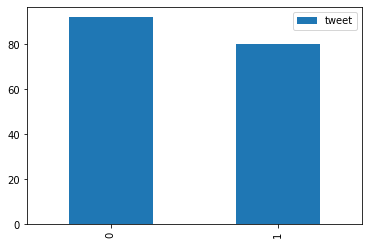

In [13]:
df.groupby('label').agg({'tweet': 'count'}).reset_index(drop=True).plot(kind='bar')

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# divisão em treino e teste
X = df[['pos_freq', 'neg_freq']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# criação do modelo de regressão logística e treinamento
lr = LogisticRegression()
lr.fit(X_train, y_train)

# avaliação do modelo nos dados de teste
y_pred = lr.predict(X_test)

# avaliando o modelo
from sklearn.metrics import accuracy_score, precision_score
print("Acurácia da classificação:", accuracy_score(y_test, y_pred))
print("Precisão da classificação (Classe 0):", precision_score(y_test, y_pred, pos_label=0))
print("Precisão da classificação (Classe 1):", precision_score(y_test, y_pred, pos_label=1))

Acurácia da classificação: 0.9807692307692307
Precisão da classificação (Classe 0): 1.0
Precisão da classificação (Classe 1): 0.9655172413793104


/home/joaoag/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/joaoag/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# pré-processamento das frases
# df['frase_processada'] = df['frase'].apply(text_cleaning_l)
df['ttweet'] = df['tweet'].apply(text_cleaning_l)

# vetorização das frases
vectorizer = CountVectorizer(tokenizer=lambda text: text, lowercase=False)
X = vectorizer.fit_transform(df['ttweet'].apply(lambda tokens: ' '.join(tokens)))

# divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.3, random_state=42)

# criação do modelo de regressão logística e treinamento
lr = LogisticRegression()
lr.fit(X_train, y_train)

# avaliação do modelo nos dados de teste
y_pred = lr.predict(X_test)

# avaliando o modelo
from sklearn.metrics import accuracy_score, precision_score
print("Acurácia da classificação:", accuracy_score(y_test, y_pred))
print("Precisão da classificação (Classe 0):", precision_score(y_test, y_pred, pos_label=0))
print("Precisão da classificação (Classe 1):", precision_score(y_test, y_pred, pos_label=1))

Acurácia da classificação: 0.7692307692307693
Precisão da classificação (Classe 0): 0.7142857142857143
Precisão da classificação (Classe 1): 0.8333333333333334


In [21]:
# Mesmo exemplo mas com o TF-IDF como vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# pré-processamento das frases
# df['frase_processada'] = df['frase'].apply(text_cleaning_l)

# vetorização das frases
vectorizer = TfidfVectorizer(tokenizer=lambda text: text, lowercase=False)
X = vectorizer.fit_transform(df['ttweet'].apply(lambda tokens: ' '.join(tokens)))

# divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.3, random_state=42)

# criação do modelo de regressão logística e treinamento
lr = LogisticRegression()
lr.fit(X_train, y_train)

# avaliação do modelo nos dados de teste
y_pred = lr.predict(X_test)

# avaliando o modelo
from sklearn.metrics import accuracy_score, precision_score
print("Acurácia da classificação:", accuracy_score(y_test, y_pred))
print("Precisão da classificação (Classe 0):", precision_score(y_test, y_pred, pos_label=0))
print("Precisão da classificação (Classe 1):", precision_score(y_test, y_pred, pos_label=1))

Acurácia da classificação: 0.7115384615384616
Precisão da classificação (Classe 0): 0.6216216216216216
Precisão da classificação (Classe 1): 0.9333333333333333


## Logistic Regression Cost Function

A função de custo da regressão logística é usada para avaliar quão bem um modelo de regressão logística está performando em relação aos dados observados. Ela é frequentemente utilizada em problemas de classificação binária, onde o objetivo é prever se uma observação pertence a uma das duas classes possíveis. Aqui está uma explicação de cada etapa da função de custo da regressão logística:

1. **Hipótese da Regressão Logística:**
   A primeira etapa é a formulação da hipótese do modelo de regressão logística. A hipótese é uma função que mapeia as entradas para uma probabilidade estimada de pertencer a uma das classes. A função logística (também conhecida como função sigmoide) é comumente utilizada como a função de hipótese na regressão logística e é dada pela seguinte equação:

   $$ h_{\theta}(x) = \frac{1}{1 + e^{-\theta^Tx}}$$

   Onde:
   - $ h_{\theta}(x) $ é a estimativa da probabilidade de \( x \) pertencer à classe positiva,
   - $ \theta $ são os parâmetros do modelo,
   - $ x $ é o vetor de entrada,
   - $ e $ é o número de Euler (aproximadamente 2.71828).


2. **Função de Custo Logístico:**
   A função de custo é uma medida de quão bem a hipótese do modelo se ajusta aos dados observados. Para a regressão logística, a função de custo (também conhecida como função de perda ou função de erro) é definida usando a técnica de máxima verossimilhança. A função de custo logístico para um único exemplo de treinamento é dada pela seguinte equação:

   $$ J(\theta) = -y \log(h_{\theta}(x)) - (1 - y) \log(1 - h_{\theta}(x)) $$

   Onde:
   - $ J(\theta) $ é a função de custo,
   - $ y $ é a classe verdadeira do exemplo (0 ou 1),
   - $ h_{\theta}(x) $ é a estimativa da probabilidade da classe positiva dada pela hipótese.


3. **Função de Custo Médio (ou Função de Custo Regularizada):**
   Para avaliar o desempenho do modelo em todo o conjunto de dados, a função de custo médio é calculada. Isso é feito tirando a média dos custos individuais de todos os exemplos de treinamento. Além disso, uma penalidade de regularização pode ser adicionada para evitar overfitting. A função de custo médio (ou função de custo regularizada) é dada pela seguinte equação:

   $$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}[-y^{(i)} \log(h_{\theta}(x^{(i)})) - (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)}))] + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2 $$

   Onde:
   - $ m $ é o número total de exemplos de treinamento,
   - $ n $ é o número de características,
   - $ \lambda $ é o parâmetro de regularização,
   - $ \theta_j $ é o j-ésimo parâmetro do modelo.

# Week 2 - Sentiment Analysis with Naive Bayes

## Objetivos de aprendizagem
- Error analysis
- Naive Bayes inference
- Log likelihood
- Laplacian smoothing
- conditional probabilities
- Bayes rule
- Sentiment analysis
- Vocabulary creation
- Supervised learning

## Recaptulando...

1. **Probabilidade:**
   A probabilidade é uma medida numérica que quantifica a incerteza associada a um evento. Em termos simples, é a chance de que algo aconteça. A probabilidade de um evento é sempre um número entre 0 e 1, onde 0 indica impossibilidade absoluta do evento ocorrer e 1 indica certeza absoluta de que o evento ocorrerá.
   
<img src="./imgs/prob_positive_tweet.png">
<img src="./imgs/prob_positive_tweet2.png">

2. **Probabilidade Condicional:**
   A probabilidade condicional é a probabilidade de um evento ocorrer dado que outro evento já ocorreu. É denotada por $ P(A|B) $, que lê-se como "a probabilidade de A dado B". A fórmula para calcular a probabilidade condicional é:

   $$ P(A|B) = \frac{P(A \cap B)}{P(B)} $$

   Onde:
   - $ P(A|B) $ é a probabilidade de A dado B,
   - $ P(A \cap B) $ é a probabilidade da interseção de A e B,
   - $ P(B) $ é a probabilidade de B.

   Em palavras simples, a probabilidade condicional é a proporção de vezes que o evento A ocorre quando o evento B ocorre.

<img src="./imgs/conditional_prob_tweet.png">


3. **Regra de Bayes:**
   A regra de Bayes é uma ferramenta fundamental na teoria das probabilidades que permite atualizar as probabilidades de uma hipótese à luz de novas evidências. Formalmente, a regra de Bayes é expressa como:

   $ P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} $

   Onde:
   - $ P(A|B) $ é a probabilidade de A dado B (posterior),
   - $ P(B|A) $ é a probabilidade de B dado A (likelihood),
   - $ P(A) $ é a probabilidade de A (prior),
   - $ P(B) $ é a probabilidade de B.

   A regra de Bayes nos permite calcular a probabilidade de uma hipótese (A) ser verdadeira dada uma evidência observada (B), usando a probabilidade da evidência dada a hipótese (likelihood), a probabilidade a priori da hipótese e a probabilidade marginal da evidência.A diferença principal entre a probabilidade condicional e a regra de Bayes é que a probabilidade condicional é uma medida da probabilidade de um evento ocorrer dado que outro evento já ocorreu, enquanto a regra de Bayes é uma ferramenta para atualizar a probabilidade de uma hipótese à luz de novas evidências. A regra de Bayes utiliza a probabilidade condicional como um de seus componentes para calcular a probabilidade posterior.

<img src="./imgs/bayes_rule_tweet.png">

A probabilidade é a chance de um evento ocorrer, a probabilidade condicional é a probabilidade de um evento ocorrer dado que outro evento já ocorreu, e a regra de Bayes é uma ferramenta para atualizar a probabilidade de uma hipótese à luz de novas evidências.

## Naive Bayes

O algoritmo Naive Bayes é um método de classificação probabilístico baseado no teorema de Bayes, com uma suposição "ingênua" de independência condicional entre os recursos.

1. **Suposição de Independência Condicional:**
   A primeira etapa do algoritmo Naive Bayes é a suposição de independência condicional entre os recursos. Isso significa que assumimos que os recursos são independentes entre si, dado o valor da variável de classe. Apesar de ser uma suposição forte e muitas vezes não ser verdadeira na prática, ela simplifica os cálculos e torna o algoritmo computacionalmente eficiente.

2. **Construção do Modelo de Probabilidade:**
   O próximo passo é construir o modelo de probabilidade. Isso envolve calcular a probabilidade de cada classe e a probabilidade de cada valor do recurso dado cada classe. Em outras palavras, para cada classe, calculamos a probabilidade a priori da classe ( $ P(C_k) $ ) e a probabilidade de cada recurso ( $ P(X_i | C_k) $ ).

3. **Classificação:**
   Depois que o modelo de probabilidade é construído, podemos usá-lo para fazer previsões sobre novos exemplos. Dada uma nova instância com valores de recursos $ x_1, x_2, ..., x_n $, queremos calcular a probabilidade de pertencer a cada classe e, em seguida, atribuir a classe com a maior probabilidade como a classe prevista para a instância. Isso é feito usando o teorema de Bayes:

   $$ P(C_k | x_1, x_2, ..., x_n) = \frac{P(C_k) \cdot \prod_{i=1}^{n} P(x_i | C_k)}{P(x_1, x_2, ..., x_n)} $$

   Onde:
   - $ P(C_k | x_1, x_2, ..., x_n) $ é a probabilidade da classe $ C_k $ dado os valores dos recursos,
   - $ P(C_k) $ é a probabilidade a priori da classe $ C_k $,
   - $ P(x_i | C_k) $ é a probabilidade de cada valor do recurso dado a classe $ C_k $,
   - $ P(x_1, x_2, ..., x_n) $ é a probabilidade dos valores dos recursos.

4. **Estimação de Parâmetros:**
   Durante a etapa de construção do modelo, precisamos estimar os parâmetros do modelo, ou seja, as probabilidades a priori das classes e as probabilidades condicionais dos recursos para cada classe. Isso geralmente é feito usando técnicas como a frequência relativa de ocorrência dos dados de treinamento.

5. **Suavização de Laplace (Opcional):**
   Em alguns casos, para evitar probabilidades condicionais iguais a zero para recursos não observados em uma classe particular, pode ser aplicada a suavização de Laplace, adicionando uma pequena quantidade aos contadores de frequência de cada valor de recurso para cada classe durante a estimativa dos parâmetros.

Essas são as etapas principais da função do algoritmo Naive Bayes, desde a suposição de independência condicional até a classificação de novas instâncias usando o teorema de Bayes.

## Log Likelihood

Para construir um classificador, começaremos primeiro criando probabilidades condicionais, dada a tabela a seguir:

<img src="./imgs/naive_bayes_intro1.png">
          
Isso nos permite calcular a seguinte tabela de probabilidades:
<img src="./imgs/naive_bayes_intro2.png">

Depois de ter as probabilidades, podemos calcular a pontuação de probabilidade da seguinte forma
<img src="./imgs/naive_bayes_intro3.png">

Uma pontuação maior que 1 indica que a classe é positiva, caso contrário é negativa.

Costumamos calcular a probabilidade de uma palavra dada uma classe da seguinte forma:

$$
P(w_i \mid \text{classe}) = \frac{\text{freq}(w_i, \text{classe})}{N_{\text{classe}}}
\quad \text{classe} \in \{\text{Positivo}, \text{Negativo}\}
$$

No entanto, se uma palavra não aparecer no treinamento, ela automaticamente recebe uma probabilidade de 0. Para corrigir isso, adicionamos **suavização de laplace** da seguinte forma:

$$
P(w_i \mid \text{classe}) = \frac{\text{freq}(w_i, \text{classe}) + 1}{N_{\text{classe}} + V}
$$

Observe que adicionamos um 1 no numerador e, como há V palavras para normalizar, adicionamos V no denominador.

Onde:
- $N_{\text{classe}}$: frequência de todas as palavras na classe.
- $V$: número de palavras únicas no vocabulário.


Para calcular a log-verossimilhança (log likelihood), precisamos obter as razões e usá-las para calcular uma pontuação que nos permitirá decidir se um tweet é positivo ou negativo. Quanto maior a razão, mais positiva é a palavra:

<img src="./imgs/log_likelihood1.png">

Para fazer inferência, você pode calcular o seguinte:

$$
\log \left( \prod_{i=1}^{m} \frac{P(w_i \mid \text{neg})}{P(w_i \mid \text{pos})} \right) > \frac{1}{P(\text{neg}) P(\text{pos})}
$$

A expressão acima começa com um logaritmo, $\log$, que é aplicado a um produto de probabilidades condicionais. O produto é denotado pelo símbolo $\prod$ e representa o produto de todas as probabilidades condicionais das palavras $w_i$ dadas as classes "negativo" e "positivo". Isso significa que estamos multiplicando a probabilidade de cada palavra $w_i$ ocorrer, dado que o tweet é negativo, e dividindo pelo mesmo para tweets positivos.

A expressão é comparada com o inverso do produto das probabilidades das classes "negativo" e "positivo". Isso é feito usando o sinal $>$, indicando que queremos que a expressão à esquerda seja maior do que o inverso do produto das probabilidades das classes.

Em termos de interpretação, isso significa que estamos comparando a probabilidade conjunta de todas as palavras em um tweet serem negativas (ou positivas) com a probabilidade de um tweet ser classificado como negativo (ou positivo), independente do conteúdo do tweet. Se a probabilidade conjunta de todas as palavras serem negativas (ou positivas) for maior do que a probabilidade do tweet ser classificado como negativo (ou positivo) independentemente do conteúdo, então a inferência seria que o tweet é mais provavelmente negativo (ou positivo).

Essa expressão é uma maneira de inferir a polaridade (positiva ou negativa) de um tweet com base na probabilidade condicional de cada palavra em relação às classes "negativo" e "positivo", em comparação com a probabilidade marginal das classes. Se a probabilidade conjunta das palavras sendo negativas (ou positivas) for maior do que a probabilidade do tweet ser classificado como negativo (ou positivo) independentemente do conteúdo, então a inferência seria que o tweet é mais provavelmente negativo (ou positivo).

Conforme o número de palavras do tweet (m) aumenta, podemos ter problemas numéricos, então introduzimos o logaritmo, que nos dá a seguinte equação:

$$
\log \left( \prod_{i=1}^{m} \frac{P(w_i \mid \text{neg})}{P(w_i \mid \text{pos})} \right) \Rightarrow \log \prod_{i=1}^{m} \frac{P(w_i \mid \text{neg})}{P(w_i \mid \text{pos})} + \sum_{i=1}^{m} \log \frac{P(w_i \mid \text{neg})}{P(w_i \mid \text{pos})}
$$

Utilizando a propriedade do logaritmo de um produto, podemos reescrever a expressão como a soma dos logaritmos dos fatores dentro do produto. Esta transformação nos permite calcular a log-verossimilhança de forma mais eficiente e robusta, evitando o custo computacional de calcular o logaritmo de um produtório. A expressão agora é uma soma de logaritmos individuais, o que é mais estável numericamente. A nova expressão nos permite calcular a log-verossimilhança somando os logaritmos das razões das probabilidades condicionais de cada palavra em relação às classes "negativo" e "positivo". Isso nos dá uma medida da probabilidade de observar as palavras em um tweet dado que ele é classificado como negativo, em comparação com a mesma probabilidade para tweets positivos. Essa transformação simplifica o cálculo da log-verossimilhança e reduz a chance de problemas numéricos, tornando a inferência mais eficiente e precisa.

O primeiro componente é chamado de log prior e o segundo componente é a log-verossimilhança. Introduzimos ainda $\lambda$ como segue:

<img src="./imgs/log_likelihood2.png">

Ter o dicionário $\lambda$ ajudará muito ao fazer inferência, mas uma vez que computemos o dicionário $\lambda$, se torna simples fazer a inferência, simplesmente somando os lambdas e comparando com os thresholds de negativo, neutro e positivo.

<img src="./imgs/log_likelihood3.png">

O resultado foi **3.3**, sendo > 0, classificaremos o documento como positivo. Se tivessemos um número negativo, classificaríamos como a classe negativa

## Training Naïve Bayes

In [23]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Pré-processamento
df["ttweet"] = df["tweet"].apply(text_cleaning)
df["ttweet"] = df["ttweet"].apply(lambda x: " ".join(x))

# Listas de palavras positivas e negativas
positive_words = df[df["label"] == 0]["ttweet"].to_list()
positive_words = word_tokenize(' '.join(positive_words))

negative_words = df[df["label"] == 1]["ttweet"].to_list()
negative_words = word_tokenize(' '.join(negative_words))

# Funções para mapear frequências de palavras
def positive_words_frequency(tweet):
    tokens = word_tokenize(tweet.lower())
    freq = FreqDist(tokens)
    positive_freq = sum([freq[word] for word in positive_words])
    return positive_freq

def negative_words_frequency(tweet):
    tokens = word_tokenize(tweet.lower())
    freq = FreqDist(tokens)
    negative_freq = sum([freq[word] for word in negative_words])
    return negative_freq

# Aplicando as funções e adicionando colunas ao dataframe
df['bias'] = 1
df['pos_freq'] = df['ttweet'].apply(positive_words_frequency)
df['neg_freq'] = df['ttweet'].apply(negative_words_frequency)

# Modelagem com Naive Bayes ou Regressão Logística
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# Criando e treinando o modelo
model = MultinomialNB() # Exemplo: usando Naive Bayes
model.fit(df[['bias', 'pos_freq', 'neg_freq']], df['label'])

# Fazendo previsões
predictions = model.predict(df[['bias', 'pos_freq', 'neg_freq']])

# Avaliando o desempenho do modelo
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(df['label'], predictions)
print(f"Acurácia do modelo: {accuracy}")
print("Precisão da classificação (Classe 0):", precision_score(y_test, y_pred, pos_label=0))
print("Precisão da classificação (Classe 1):", precision_score(y_test, y_pred, pos_label=1))

Acurácia do modelo: 0.9709302325581395
Precisão da classificação (Classe 0): 0.6216216216216216
Precisão da classificação (Classe 1): 0.9333333333333333


/home/joaoag/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/joaoag/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Separando os tweets e seus sentimentos
X = [tweet[0] for tweet in tweets]
y = [sentimento for _, sentimento in tweets]

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando uma matriz de frequência de palavras
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Treinando o classificador Naive Bayes
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

# Fazendo previsões
predictions = clf.predict(X_test_counts)

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, predictions)
print("Acurácia do modelo:", accuracy)
# print("Precisão da classificação (Classe 0):", precision_score(y_test, y_pred, pos_label=0))
# print("Precisão da classificação (Classe 1):", precision_score(y_test, y_pred, pos_label=1))

Acurácia do modelo: 0.8857142857142857


Visão geral de como o algoritmo funciona:

- Treinamento: Durante a fase de treinamento, o algoritmo calcula a probabilidade de cada classe (por exemplo, positivo, negativo) ocorrer, bem como as probabilidades condicionais de cada feature (palavra) dado cada classe. Essas probabilidades são estimadas a partir dos dados de treinamento.

- Previsão: Durante a fase de previsão, o algoritmo utiliza o Teorema de Bayes para calcular a probabilidade de cada classe dado um conjunto de features (no caso, as palavras em um tweet). A classe com a maior probabilidade posterior é então atribuída como a classe prevista para a instância.

- Suavização de Laplace: Para evitar problemas quando uma palavra não aparece no conjunto de treinamento para uma determinada classe, é comum aplicar uma técnica de suavização chamada Suavização de Laplace, que adiciona uma contagem pseudocount para todas as features durante o cálculo das probabilidades condicionais.

- Vantagens e Desvantagens: O Naive Bayes é fácil de implementar, eficiente em termos de tempo de treinamento e pode funcionar bem mesmo com conjuntos de dados pequenos. No entanto, sua suposição de independência entre as features pode não ser realista em muitos casos, o que pode levar a resultados subótimos em certas situações.

## Testing Naïve Bayes

<img src="./imgs/naive_bayes_test.png">

## Applications of Naïve Bayes

O algoritmo Naive Bayes é amplamente utilizado em uma variedade de aplicações em Data Science e Machine Learning devido à sua simplicidade, eficiência computacional e bom desempenho em muitos cenários. Como em:

1. **Classificação de Texto:** Naive Bayes é frequentemente usado para classificar documentos de texto em categorias, como spam vs. não spam em e-mails, classificação de sentimentos em redes sociais, detecção de tópicos em artigos de notícias, entre outros.

2. **Filtragem de Spam:** É um uso clássico de Naive Bayes, onde o algoritmo é treinado com uma base de dados de e-mails rotulados como spam ou não spam, e então usado para prever se novos e-mails são spam ou não.

3. **Análise de Sentimento:** Naive Bayes é eficaz na análise de sentimentos em dados textuais, como comentários de clientes, análise de feedbacks de produtos e análise de redes sociais, ajudando a determinar se um texto é positivo, negativo ou neutro.

4. **Classificação de Documentos:** Além de filtragem de spam, Naive Bayes é usado para categorizar documentos em diferentes classes, como classificar notícias em categorias como política, esportes, entretenimento, etc.

5. **Sistemas de Recomendação:** Pode ser utilizado em sistemas de recomendação para classificar e sugerir itens com base no histórico de interações do usuário, como classificar produtos em sites de compras ou recomendar filmes ou músicas em plataformas de streaming.

6. **Diagnóstico Médico:** Na área médica, o Naive Bayes pode ser aplicado para auxiliar no diagnóstico de doenças, utilizando características dos pacientes para prever a presença ou ausência de certas condições médicas.

7. **Análise de Risco Financeiro:** Naive Bayes é utilizado em análises de risco financeiro para prever riscos de crédito, detectar fraudes em transações financeiras e realizar análises de mercado.

8. **Previsão de Churn:** Na área de negócios, o Naive Bayes pode ser usado para prever a probabilidade de um cliente cancelar um serviço (churn), com base em dados históricos de comportamento do cliente.

Sua simplicidade e eficiência o tornam uma escolha popular em uma variedade de cenários.

## Naïve Bayes Assumptions

O algoritmo Naive Bayes é baseado em algumas premissas importantes, que são fundamentais para o seu funcionamento. Como:

1. **Independência Condicional:** Esta é a premissa mais crucial e é de onde o "Naive" em "Naive Bayes" vem. O algoritmo assume que as features (ou atributos) usadas para a classificação são independentes entre si, dadas as classes. Em outras palavras, ele assume que a presença ou ausência de uma característica não está relacionada à presença ou ausência de outras features, dado o resultado da classe. Embora esta premissa raramente seja verdadeira na prática, o Naive Bayes muitas vezes funciona bem mesmo quando ela é violada, tornando-o muito eficaz em muitos casos.

2. **Presença de Dados de Treinamento:** O Naive Bayes requer um conjunto de dados de treinamento que inclua exemplos rotulados. Ou seja, para cada exemplo, deve-se saber a que classe ele pertence. Esses exemplos de treinamento são essenciais para estimar as probabilidades necessárias para a classificação.

3. **Distribuição de Features:** O Naive Bayes assume uma distribuição específica para as features. Embora seja comum assumir uma distribuição de Bernoulli para features binárias, o Naive Bayes também pode ser aplicado com **distribuições multinomiais** (para features categóricas) e distribuições gaussianas (para features contínuas).

4. **Probabilidades Condicionais:** O algoritmo Naive Bayes usa a teoria das probabilidades para calcular a probabilidade de uma instância pertencer a cada classe com base nas features observadas. Ele assume que as probabilidades condicionais de cada classe dado o conjunto de features podem ser calculadas facilmente.

Essas premissas são simplificações significativas da realidade, e é por isso que o algoritmo é chamado de "Naive" (ingênuo). No entanto, apesar de suas simplificações, o Naive Bayes muitas vezes funciona surpreendentemente bem em uma variedade de problemas de classificação, desde que as premissas sejam razoavelmente satisfeitas.

# Week 3 - Vector Space Models

## Objetivos de aprendizagem
- Covariance matrices
- Dimensionality reduction
- Principal component analysis
- Cosine similarity
- Euclidean distance
- Co-occurrence matrices
- Vector representations
- Vector space models

# Week 4